In [3]:
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import uncertainty_wizard as uwiz
from sklearn.model_selection import train_test_split


Training data:        (56000, 28, 28)
Training solution:    (56000,)
Test data:            (14000, 28, 28)
Test solution:        (14000,)


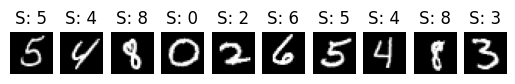

Training data:        (56000, 28, 28, 1)
Training solution:    (56000, 10)
Test data:            (14000, 28, 28, 1)
Test solution:        (14000, 10)


In [4]:
# LOAD
data = pd.read_csv('../mnist.csv')
x_all = data.drop('solution', axis=1).values
y_all = data['solution'].values

# RESHAPE
x_all_fixed = x_all.reshape(-1, 28, 28)

# SPLIT
x_train, x_test, y_train, y_test = train_test_split(x_all_fixed, y_all, test_size=0.2, random_state=42)


print("Training data:       ", x_train.shape)
print("Training solution:   ", y_train.shape)
print("Test data:           ", x_test.shape)
print("Test solution:       ", y_test.shape)

fig, axes = plt.subplots(1, 10)
for i in range(10):
    axes[i].imshow(x_train[i], cmap='gray', vmin=0, vmax=255)
    axes[i].set_title(f"S: {y_train[i]}")
    axes[i].axis('off')
plt.show()

x_train = (x_train.astype('float32') / 255).reshape(x_train.shape[0], 28, 28, 1)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
x_test = (x_test.astype('float32') / 255).reshape(x_test.shape[0], 28, 28, 1)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)      #??????????

print("Training data:       ", x_train.shape)
print("Training solution:   ", y_train.shape)
print("Test data:           ", x_test.shape)
print("Test solution:       ", y_test.shape)

2024-02-02 19:03:15.985821: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-02 19:03:15.987437: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (AMD Radeon RX 6750 XT)
2024-02-02 19:03:16.433348: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-02 19:03:16.433380: W tensorflow/core/common_runtime/pluggable_device/pluggable_device_bfc_allocator.cc:28] Overriding allow_growth setting because force_memory_growth was requested by the device.
2024-02-02 19:03:16.433402: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_fac

COMPILING...
FIT...


2024-02-02 19:03:16.609646: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 158054400 exceeds 10% of free system memory.
2024-02-02 19:03:17.465449: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 158054400 exceeds 10% of free system memory.
2024-02-02 19:03:18.425999: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-02-02 19:03:18.502788: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-02 19:03:18.502893: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 17825 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


11/11 [==============================] - 2s 113ms/step - loss: 2.3026 - accuracy: 0.1049 - val_loss: 2.3015 - val_accuracy: 0.1252
SAVING SETTINGS...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 uwiz_bernoulli_dropout (Uwi  (None, 12, 12, 64)       0         
 zBernoulliDropout)                                              
                                                                 
 flatten (Flatten)           (None, 92

2024-02-02 19:03:20.459430: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-02-02 19:03:20.492338: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-02 19:03:20.492406: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 17825 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


None
PLOT...


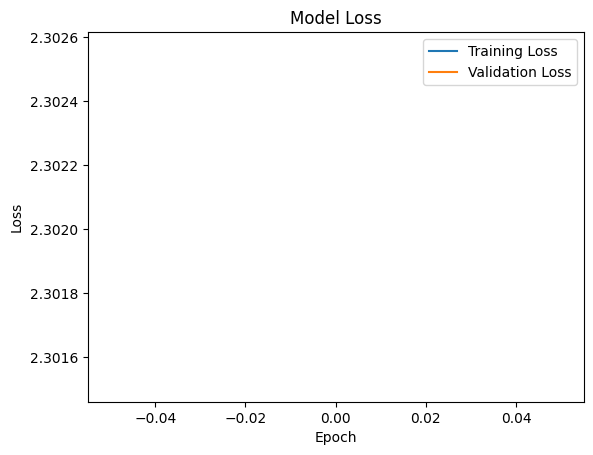

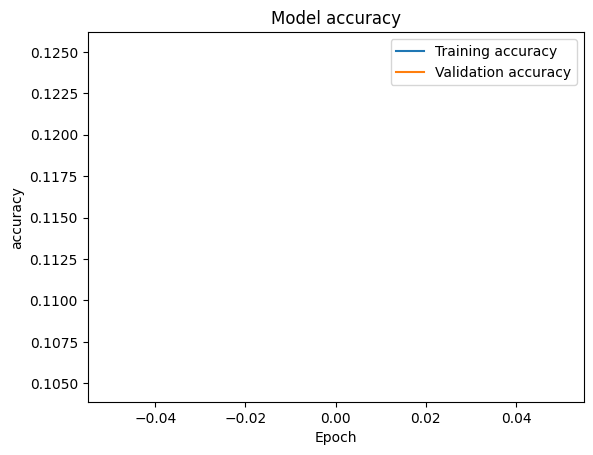

In [5]:

# model = tf.keras.models.Sequential()
model = uwiz.models.StochasticSequential()


# model.add(tf.keras.layers.Conv2D(filters, kernel_size=(size), activation='methods', input_shape=(shape info)))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

# model.add(tf.keras.layers.MaxPooling2D(pool_size=(max pooling height and width)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# model.add(tf.keras.layers.Dropout(fraction %)) 
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Flatten())

# model.add(tf.keras.layers.Dense(digits, activation='methods'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# COMPILE
print("COMPILING...")
model.compile(loss      = tf.keras.losses.categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adadelta(),
              metrics   = ['accuracy'])

# FIT
print("FIT...")
model_info = model.fit(x_train, y_train, 
                       validation_split = 0.1, 
                       batch_size       = 5000, 
                       epochs           = 1,
                       verbose          = 1, 
                       callbacks        = [tf.keras.callbacks.EarlyStopping(patience=2)])

# SAVING SETTINGS
print("SAVING SETTINGS...")
# model.save("model_settings") dosent work with uwiz.models.StochasticSequential()
model.inner.save_weights('model_weights')

print(model.inner.summary())


# PLOT
print("PLOT...")
plt.plot(model_info.history['loss']     , label='Training Loss')
plt.plot(model_info.history['val_loss'] , label='Validation Loss')

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(model_info.history['accuracy']     , label='Training accuracy')
plt.plot(model_info.history['val_accuracy'] , label='Validation accuracy')

plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()